<a href="https://colab.research.google.com/github/151ali/lr-pytorch/blob/main/6_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

paper : [VERY DEEP CONVOLUTIONAL NETWORKS FOR LARGE-SCALE IMAGE RECOGNITION](https://arxiv.org/pdf/1409.1556.pdf)

VGG16

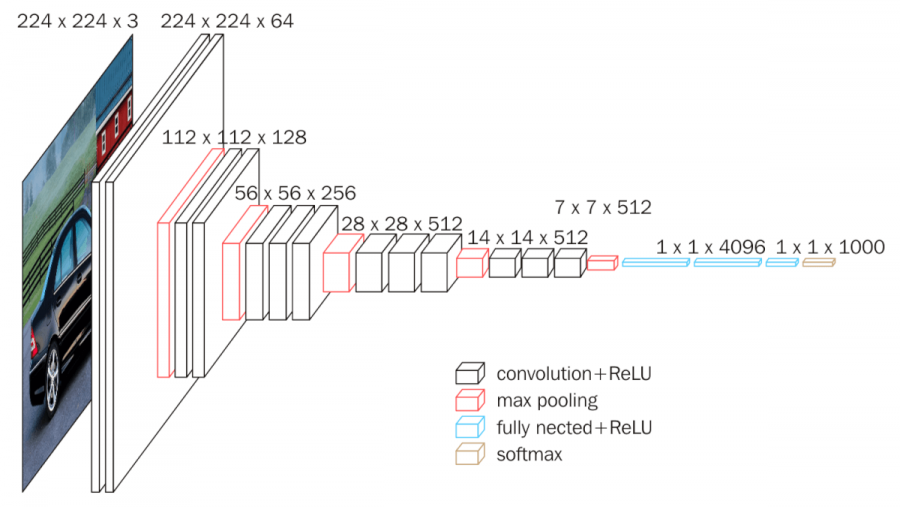

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
VGG16 = [64,64,"M",128,128,"M",256,256,256,"M",512,512,512,"M",512,512,512,"M"]

class VGGNet(nn.Module):
  def __init__(self, in_channels, num_classes):
    super(VGGNet, self).__init__()

    self.in_channels = in_channels
    self.features = self.create_conv_layers(VGG16)
    
    self.classifier = nn.Sequential(
        nn.Linear(512*7*7,4096), # 224 / 2**(5 ~ Maxpool)
        nn.ReLU(),
        nn.Dropout(p=.5),
        nn.Linear(4096, 4096),
        nn.ReLU(),
        nn.Dropout(p=.5),
        nn.Linear(4096, num_classes)
    )


  def forward(self, x):
    x = self.features(x)
    x = torch.flatten(x, 1)
    x = self.classifier(x)

    return x

  def create_conv_layers(self, architecture):
    layers = []
    in_channels = self.in_channels

    for x in architecture:
      if type(x) == int: # its a Conv layer
        out_channels = x
        layers += [(nn.Conv2d(in_channels = in_channels,out_channels = out_channels,
                              kernel_size=(3, 3),stride=(1, 1),padding=(1, 1),bias=False
        )),
        nn.BatchNorm2d(x), # not included in original VGG paper
        nn.ReLU()]
      
        in_channels = x # update the next in_channels
      elif x =="M" : # Maxpool
        layers+= [nn.MaxPool2d(kernel_size=(2, 2),stride=(2, 2))]
    return nn.Sequential(*layers)


In [4]:
model = VGGNet(in_channels=3, num_classes=1000)

In [5]:
model.to(device=device)

VGGNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  

In [6]:
x = torch.randn(1,3,224,244).to(device)

In [8]:
model(x).shape

torch.Size([1, 1000])